# **Tutorial 2: What is an Extreme Event? Empirical Return Levels**

**Week 2, Day 4, Extremes & Vulnerability**

**Content creators:** Matthias Aengenheyster, Joeri Reinders

**Content reviewers:** Younkap Nina Duplex, Sloane Garelick, Zahra Khodakaramimaghsoud, Peter Ohue, Laura Paccini, Jenna Pearson, Agustina Pesce, Derick Temfack, Peizhen Yang, Cheng Zhang, Chi Zhang, Ohad Zivan

**Content editors:** Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS

# **Tutorial Objectives**

In this second tutorial, you will calculate the precipitation levels associated with the 50, 100, and 500-year events using the empirical method.

By the end of this tutorial, you will have the ability to:

- Calculate empirical return levels
- Visualize a data record using a return-level plot

# **Setup**

In [11]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import os
import pooch

In [12]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

In [14]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

# **Section 1: Calculating Return Levels**

The 100-year event represents a precipitation level that is expected to occur only once every 100 years, indicating an event with a 1% chance of occurring in any given year. Similarly, the 2-year event has a 50% chance of occurring annually. These return periods, as they are commonly referred to, play a crucial role in policymaking and infrastructure design. For instance, bridges are constructed to withstand 100-year flood events, evacuation plans are tailored for 50-year earthquakes, and nuclear power plants are engineered to withstand 10,000-year storms.

To determine the return levels associated with a specific return period, there are two approaches: empirical calculation and the use of probability density functions (PDF) within a distribution. In this tutorial, we will first focus on the empirical method.

First download and open the precipitation record in Germany (from the last tutorial)and plot it over time: 

In [15]:
# download file: 'precipitationGermany_1920-2022.csv'
url_precipitationGermany = "https://osf.io/xs7h6/download"


data = pd.read_csv(pooch.retrieve(url_precipitationGermany, known_hash=None),
                   index_col=0).set_index('years')
data.columns=['precipitation']
precipitation = data.precipitation

Text(0, 0.5, 'Annual Maximum Daily Precipitation \n(mm/day)')

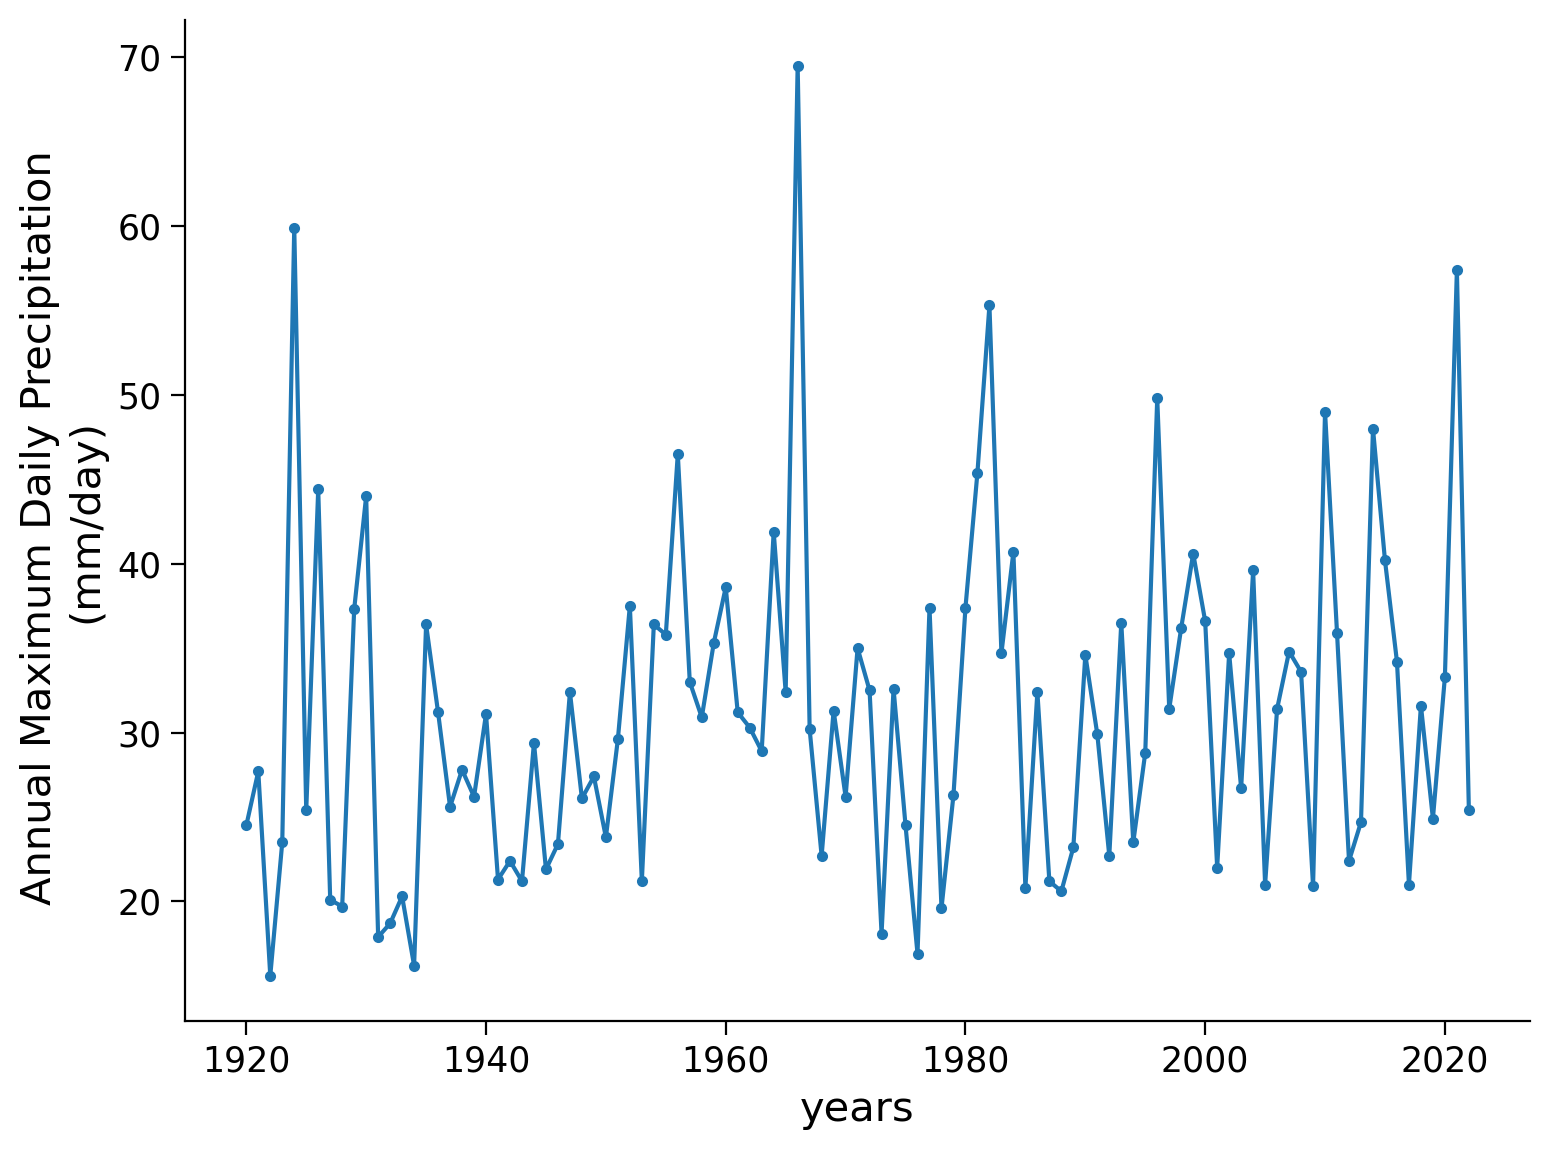

In [16]:
precipitation.plot.line(style='.-')
plt.ylabel('Annual Maximum Daily Precipitation \n(mm/day)')

In this tutorial, we will calculate the return period for each event in the dataset, specifically for each maximum precipitation value recorded in a given year. To accomplish this, we will begin by ranking the precipitation levels in descending order using the sort function. The sorted data will be saved in the first column of a matrix named "precip" with four columns, and the number of rows will correspond to the number of data entries.

In the second column of the matrix, we will store the ranks assigned to each precipitation value, with the highest value assigned a rank of 1 and the lowest value assigned a rank corresponding to the total number of entries (e.g., 103).

In [18]:
# create a data frame from precipitation data
precip_df = pd.DataFrame(index=np.arange(data.precipitation.size))

In [19]:
# sort the data
precip_df['sorted'] = np.sort(data.precipitation)[::-1]

In [20]:
# assign the ranks
precip_df['ranks'] = np.arange(data.precipitation.size)

In [21]:
# len() gives the length of the list 
len(precip_df) 

103

In [22]:
# the command np.unique gives back only unique values, and len() gives the length.
# Thus len(np.unique()) shows how many unique values can be found in the data in question.
len(np.unique(precip_df['sorted']))

87


Since we have 103 precipitation values but only 87 unique ones, we have a few instances where values are duplicated. It is important to ensure that these duplicate values are assigned the same rank. To address this, we can utilize the `rankdata` function from the `scipy` library. This function assigns similar values the same rank. After obtaining the ranks, we need to sort them before incorporating them into our matrix.


In [23]:
# rank via scipy instead to deal with duplicate values
precip_df['ranks_sp'] = np.sort(stats.rankdata(-data.precipitation))

In [24]:
# the command set gives back only unique values. 
len(np.unique(precip_df['ranks_sp']))

87

Now, the length of ranks is the same as the length of unique values. 
Next we compute the empirical probability of exceedance by dividing the rank (r) by the total
amount of values (n) plus 1.


In [25]:
# find exceedance probability
n = data.precipitation.size
precip_df['exceedance'] = precip_df['ranks_sp']/(n+1)

The return period and the chance of exceedance are related through T = 1/P

In [26]:
# find return period
precip_df['period'] = 1 / precip_df['exceedance']

In [27]:
precip_df

,sorted,ranks,ranks_sp,exceedance,period
0,69.5,0,1.0,0.009615,104.000000
1,59.9,1,2.0,0.019231,52.000000
2,57.4,2,3.0,0.028846,34.666667
3,55.3,3,4.0,0.038462,26.000000
4,49.8,4,5.0,0.048077,20.800000
...,...,...,...,...,...
98,18.1,98,99.0,0.951923,1.050505
99,17.9,99,100.0,0.961538,1.040000
100,16.9,100,101.0,0.971154,1.029703
101,16.2,101,102.0,0.980769,1.019608


Now that we know the return periods of each annual maximum precipitation level we can create
a return level plot - a plot of return levels against return periods:

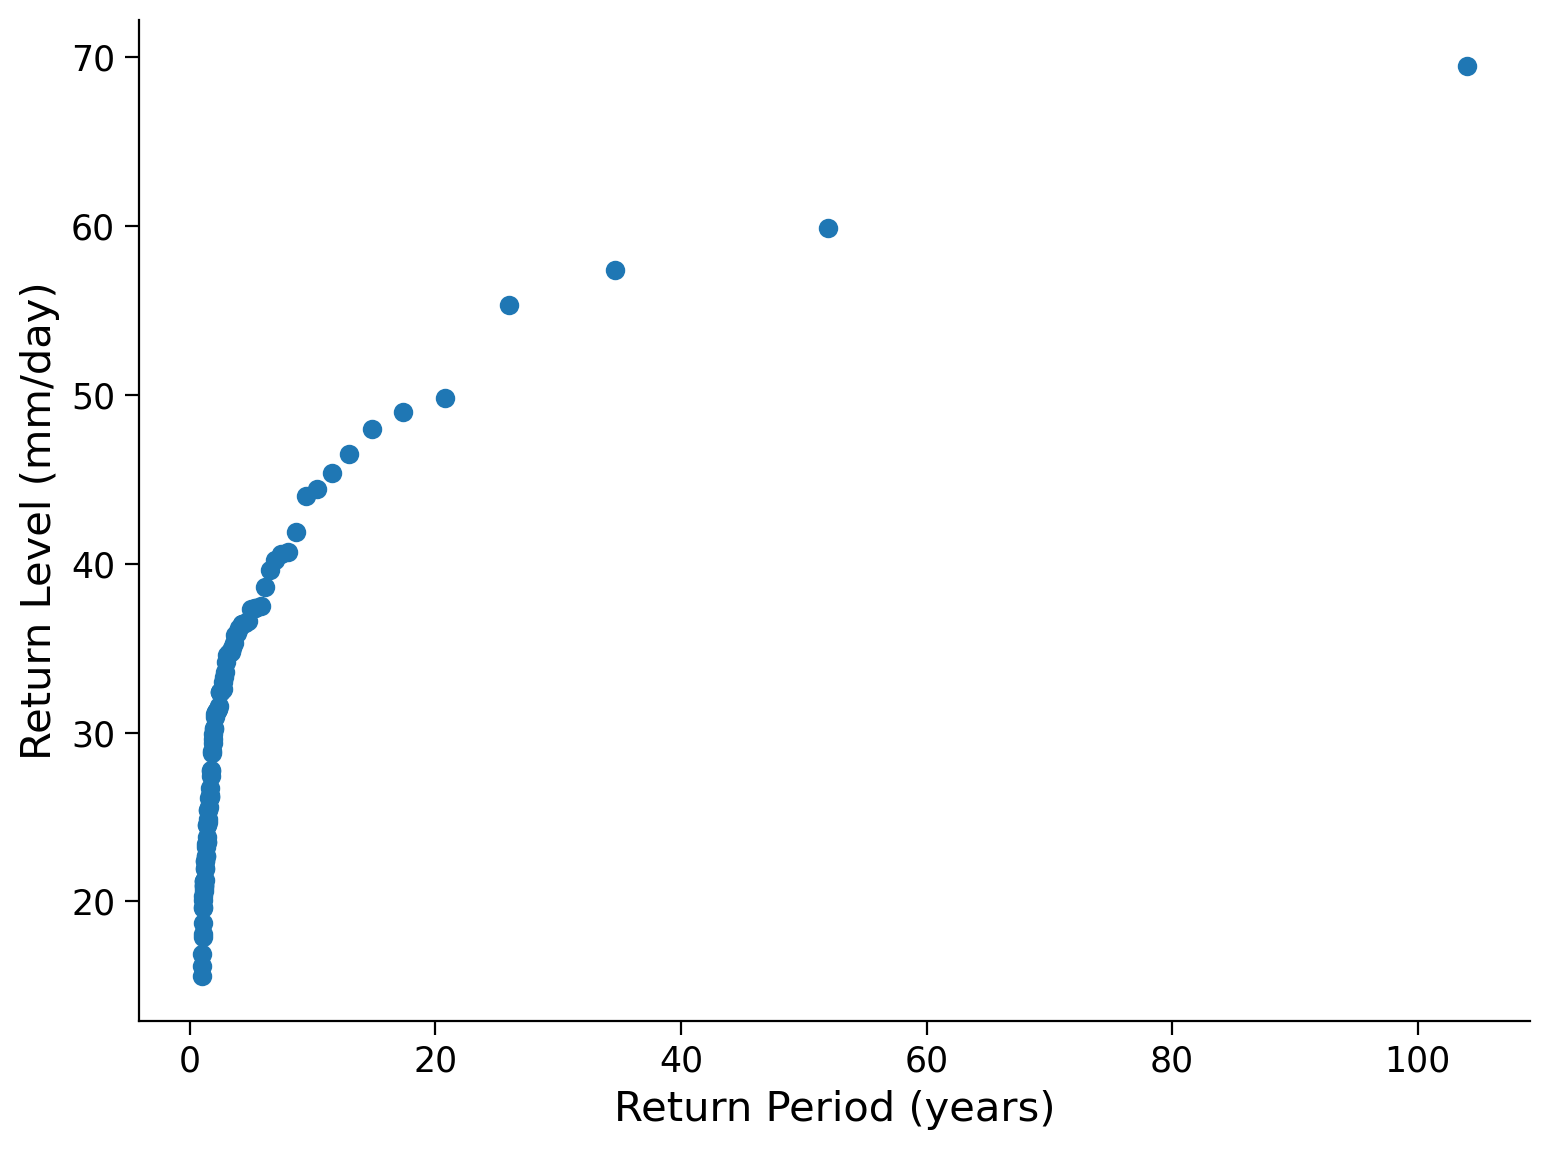

In [28]:
# plot the results
fig,ax=plt.subplots()
ax.plot(precip_df['period'],precip_df['sorted'],'o')
ax.set_xlabel('Return Period (years)')
ax.set_ylabel('Return Level (mm/day)')
ax.set_xscale('linear') # notice the xscale 

Frequently, we discuss return periods using a logarithmic scale, referring to events with return periods of 1 year, 10 years, and 100 years. Let's modify the plot above by changing the x-axis to a logarithmic scale.

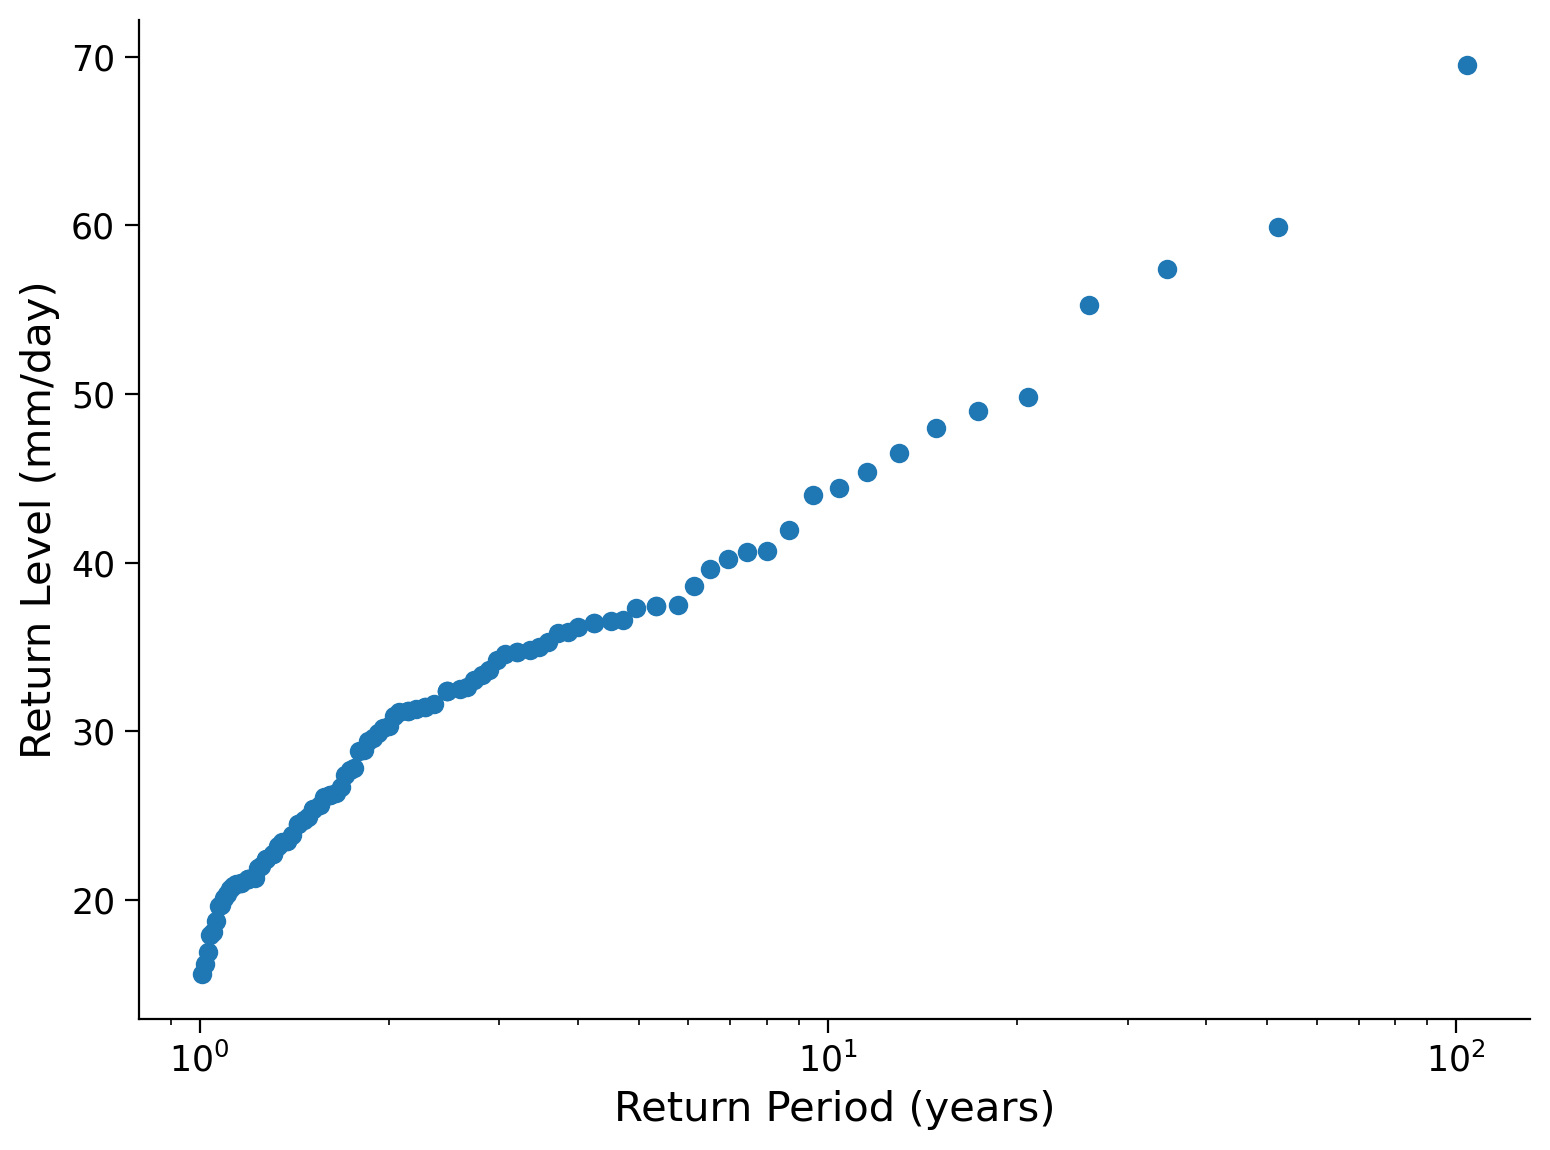

In [30]:
fig,ax=plt.subplots()
ax.plot(precip_df['period'],precip_df['sorted'],'o')
ax.set_xlabel('Return Period (years)')
ax.set_ylabel('Return Level (mm/day)')
ax.set_xscale('log') # change the xscale 

## Questions 1: 

1. From the figure, what is the return level associated with the 1, 10, and 100 year return periods.

2. It is important to note that the plots we have just made represent a single data record, which means our estimate of "extreme values" relies on a limited number of data points. Considering this, how confident can we be about the return periods or levels of extreme values based on this plot?

In [44]:
# to_remove explanation
"""
1. 10, 40 and 70 mm/day.
2. Our data only spans from 1920 to 2022. If we are truly interested in 100-year events we need to work with a longer dataset perhaps using paleo proxies or other instrumentation. The longer the dataset, the more frequently we would expect to observe the long return period events and increase our confidence in them. Other ideas would be estimating probability/cumulative density functions (next few tutorials) or to use resampling methods (coding exercise below).
""";

## Coding Exercise 1: 

We would like to have as much data as possible, because then we can sample more of what is possible, and be more sure we have not missed anything important. However, often we are limited by the available data, which is less than we would like.

Fortunately, there is a trick that allows us to use the data itself to tell us about its own uncertainty. This method is called "bootstrapping", in reference to the saying of "pulling oneself up by one's bootstraps". 

This method works by assuming that while we have limited data, the data that we do have is nevertheless a representative sample of possible events - that is we assume that we did not miss anything systematic. Then, we use the data as a distribution to draw "fake" observations from, and compute uncertainties using those:

1. We pull artificial observations from our data - with replacement.
2. We draw as many observations as our data record is long. This record will now only include data points that we observed before, but some will show up several times, some not at all.
3. We compute our statistics over this artifical record - just as we did to the record itself.
4. We repeat this process many times.
5. Thus we compute our statistics over many artificial records, which can give us an indication of the uncertainty.

Remember, this only works under the assumption that our data is representative of the process - that we did not systematically something about the data. We cannot use this to estimate how hot it could get during noon if we only recorded the temperature at night. 

In this exercise, you may now:
1. Define a function to calculate the empirical return period, then take 1000 resamples with replacement (each value could be sampled more than one) and plot the associated return level curves for each sample, together with the return period of the original data set.

In [39]:
#################################################
# Students: Fill in missing code (...) and comment or remove the next line
raise NotImplementedError("Student exercise:  Create 1000 resamples of the data and plot the associated return levels.")
#################################################

# define a function to calculate the empirical return period by using the code from the cells above.
# add period and sorted to a dataframe as before
def empirical_period(data):
    ...

    return df[['period','sorted']].set_index('period')['sorted']

# setup figure
fix,ax=plt.subplots()

# create 1000 resamples of the data, with replacement set to tru.
for i in range(...):
    empirical_period(
        # select the randome sample the same length as original data with replacement and plot
        np.random.choice(...,size=...,replace=...)
        ).plot(style='C0-',alpha=0.1,ax=ax)
    
# aesthetics
ax.plot(precip_df['period'],precip_df['sorted'],'ko')
ax.set_xlabel('Return Period (years)')
ax.set_ylabel('Return Level (mm/day)')
ax.set_xscale('log')

NotImplementedError: Student exercise:  Create 1000 resamples of the data and plot the associated return levels.

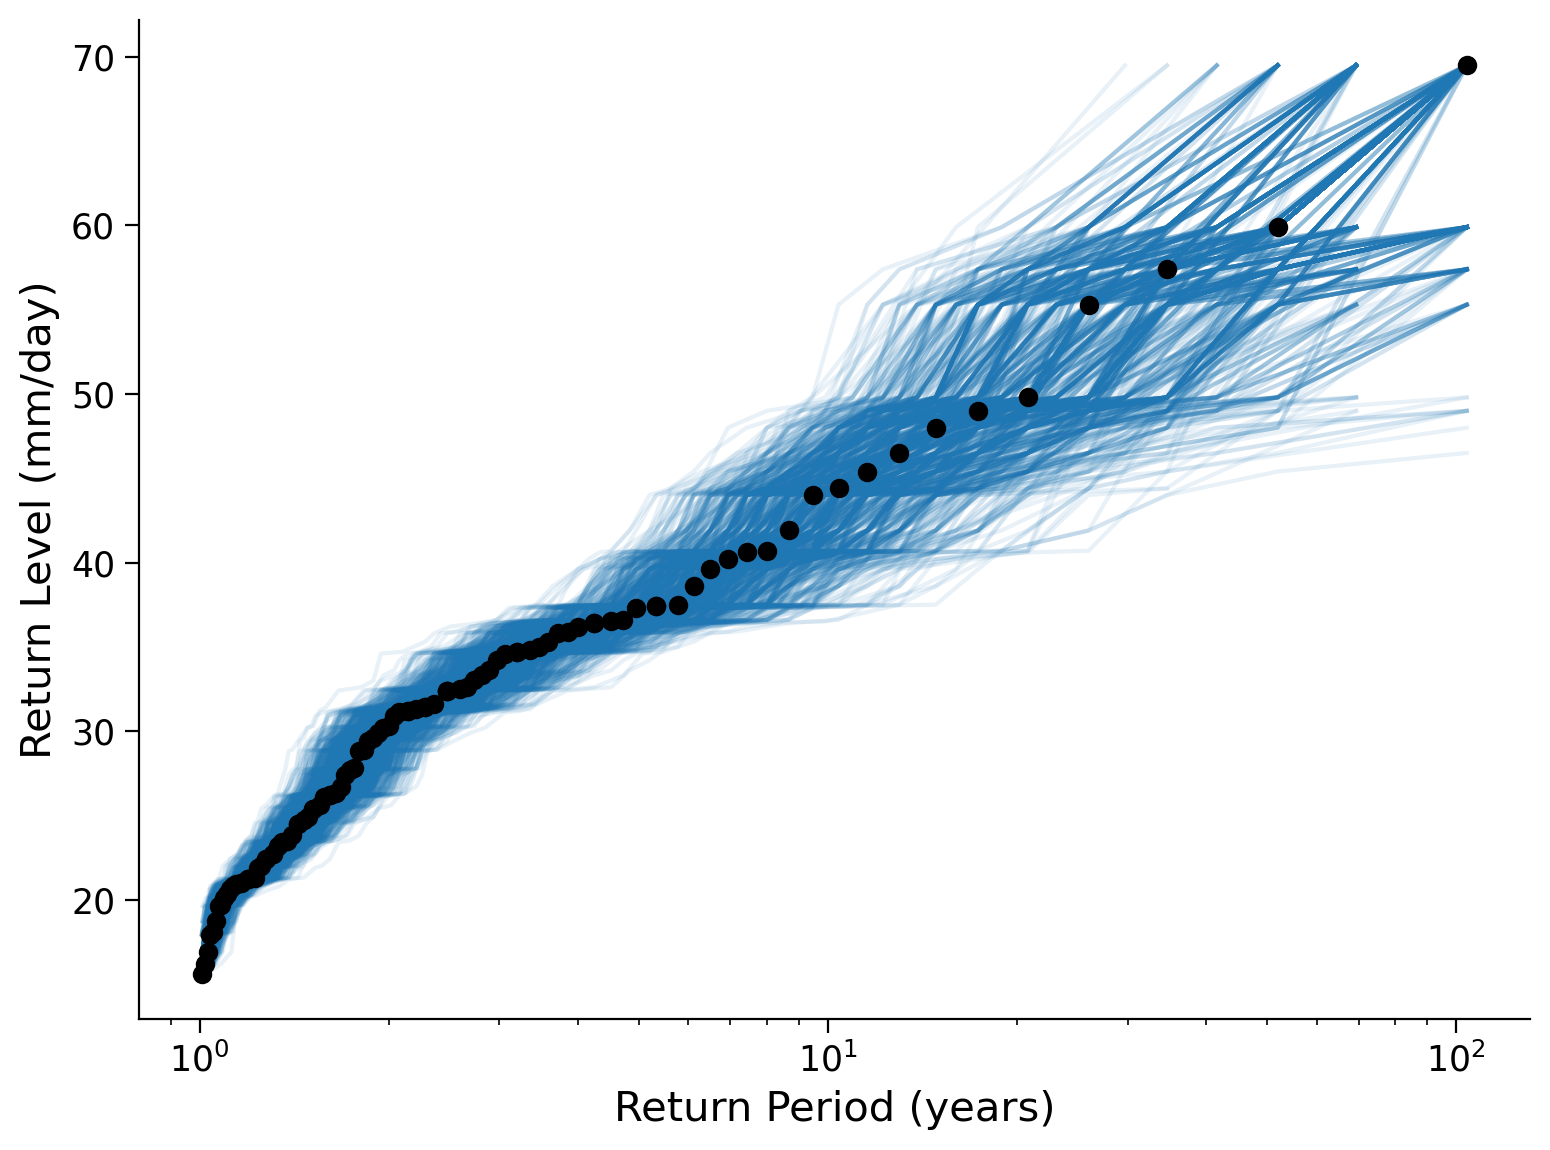

In [40]:
# to remove solution

# define a function to calculate the empirical return period by using the code from the cells above.
# add period and sorted to a dataframe as before
def empirical_period(data):
    df = pd.DataFrame(index=np.arange(data.size))
    df['sorted'] = np.sort(data)[::-1]
    df['ranks'] = np.arange(data.size)
    df['ranks_sp'] = np.sort(stats.rankdata(-data))
    n = data.size
    P = df['ranks_sp']/(n+1)
    df['exceedance'] = P
    df['period'] = 1 / df['exceedance']

    return df[['period','sorted']].set_index('period')['sorted']

# setup figure
fix,ax=plt.subplots()

# create 1000 resamples of the data, with replacement set to tru.
for i in range(1000):
    empirical_period(
        # select the randome sample with replacement and plot
        np.random.choice(data.precipitation.values,size=data.precipitation.size,replace=True)
        ).plot(style='C0-',alpha=0.1,ax=ax)
    
# aesthetics
ax.plot(precip_df['period'],precip_df['sorted'],'ko')
ax.set_xlabel('Return Period (years)')
ax.set_ylabel('Return Level (mm/day)')
ax.set_xscale('log')

# **Summary**
In this tutorial, you've explored how to calculate empirical return periods and visualized these using a return-level plot. You also considered the limitations of estimating extreme values based on a single data record.

# **Resources**

Data from this tutorial can be found here. NEED TO ADD LINK